# Árboles de Decisión para Regresión
## Datos para regresión
Para explicar cómo funcionan los árboles de decisión para problemas de regresión vamos a usar los datos que se presentan en la siguiente gráfica. Para generarlos he usado la siguiente fórmula en el intervalo [-5, 5]:

![ArbolRegresi%C3%B3n_datos.PNG](attachment:ArbolRegresi%C3%B3n_datos.PNG)

### Teoría de los árboles de decisión para regresión
En el caso de regresión, en lugar de usar Gini como medida de impureza, usamos **MSE**, el **error cuadrático medio**. Recordemos la fórmula del **MSE**

![ArbolRegresi%C3%B3n_formulaMSE.PNG](attachment:ArbolRegresi%C3%B3n_formulaMSE.PNG)

Para este problema, si usamos un árbol de decisión de profundidad 2, obtenemos el siguiente árbol.

![ArbolRegresi%C3%B3n_arbol.PNG](attachment:ArbolRegresi%C3%B3n_arbol.PNG)

### Interpretación del árbol de decisión
Veamos como se haría una predicción en árbol de decisión:
* si el valor de x es menor que -4.25, por ejemplo x=-5, predice 2.2777
* Si el valor de X se encuentra en el intervalo (-4.25, -3.75] predict 1.5774
* si el valor de x se encuentra en el intervalo (-3.75, 3.05] predict 0.3566
* Si el valor de x es mayor que 3.05 predice 1.6273.
### ¿Cómo se construyen los árboles de decisión para problemas de regresión?
Los árboles de decisión para regresión también se construyen usando un algoritmo voraz. Para regresión, la función de coste es la siguiente:

![ArbolRegresi%C3%B3n_formula.PNG](attachment:ArbolRegresi%C3%B3n_formula.PNG)

* a es la abreviatura de atributo (también llamado característica o feature)
* la significa el límite del atributo
* m se refiere al número de muestras

MSE es el error cuadrático medio por sus siglas en inglés (Mean Squared Error)
### Código python para entrenar y predecir con árboles de decisión para regresión

In [ ]:
# importamos las librerías que necesitamos
import numpy as np # NumPy para manipulación numérica
np.random.seed(42) # para hacer el código reproducible
from sklearn.tree import DecisionTreeRegressor # árbol de decisión para regresión

In [ ]:
#función y = 0.1x^2 + 0.2(Ruido Gaussiano)
def f(x):
    y = 0.1*np.square(x) + 0.2*np.random.randn(x.size)
    return y

In [ ]:
# Generamos los datos x, y con la función f(x)
x = np.arange(-5,5,0.1) # x = [-5, -4.9, -4.8, ... 4.8, 4.9, 5]
y = f(x)

<Axes: >

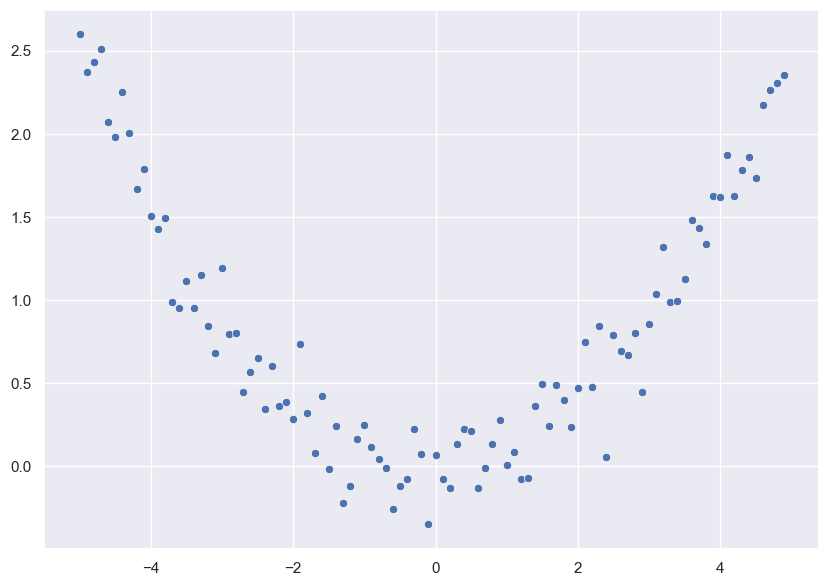

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x=x, y=y)

In [ ]:
# Vamos a crear y entrenar un árbol de decisión para regresión
tree1 = DecisionTreeRegressor(max_depth=2, random_state=42) # máxima profundidad 2
tree1.fit(x.reshape(-1,1), y) # entrenamos el árbol de regresión

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
# Ahora predecimos qué valores de y tendríamos para x2 = [-0.7, 0.5, 2.3]
x2 = np.array([-0.7, 0.5, 2.3]).reshape(-1,1)
print( tree1.predict(x2) )
# obtenemos el siguiente resultado:
# [0.35655791 0.35655791 0.35655791]

[0.35655791 0.35655791 0.35655791]


[Text(0.5, 0.8333333333333334, 'x[0] <= -3.75\nsquared_error = 0.605\nsamples = 100\nvalue = 0.813'),
 Text(0.25, 0.5, 'x[0] <= -4.25\nsquared_error = 0.154\nsamples = 13\nvalue = 2.008'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.05\nsamples = 8\nvalue = 2.278'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.018\nsamples = 5\nvalue = 1.577'),
 Text(0.75, 0.5, 'x[0] <= 3.05\nsquared_error = 0.427\nsamples = 87\nvalue = 0.634'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.142\nsamples = 68\nvalue = 0.357'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.184\nsamples = 19\nvalue = 1.627')]

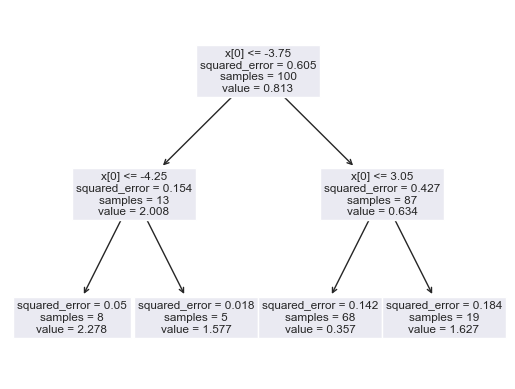

In [ ]:
from sklearn import tree
tree.plot_tree(tree1.fit(x.reshape(-1,1), y))

Había dicho que cuando el nuevo valor tenga X dentro del intervalo (-3.75, 3.05], como en este caso, el valor de salida prececida sería 0.3566, que en valor medio de las medias que caen en este intervalo.

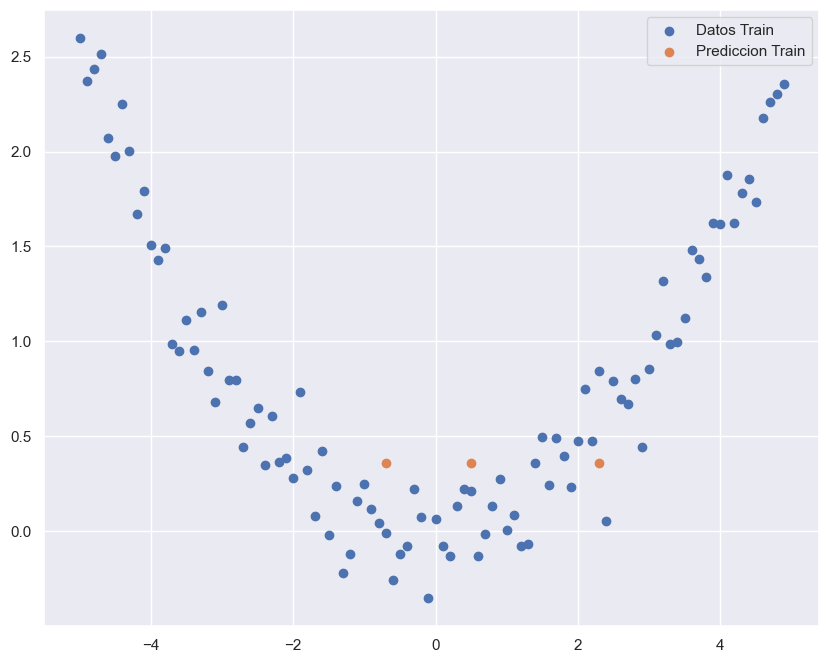

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))

plt.scatter(x, y, label = 'Datos Train')
plt.scatter(x2, y=tree1.predict(x2), label = 'Prediccion Train')

plt.legend()
plt.show()

### Regularización en árboles de decisión
Por defecto, un árbol de decisión siempre va a tender de una forma natural a sobreentrenarse, pues continuará dividiendo los datos hasta que la pureza de todos los grupos sea máxima. Para evitar el sobreentrenamiento (overfitting) y mejorar la generalización del resultado obtenido, existen varios métodos accesibles a través de los siguientes parámetros en la implementación de Scikit-Learn:
#### Árbol de decisión para Clasificación - Hiperparámetros de la librería Scikit-Learn
class sklearn.tree.DecisionTreeClassifier

* **criterion{“gini”, “entropy”, “log_loss”}, default=”gini”**
* **splitter{“best”, “random”}, default=”best”**
Así es como el árbol de decisión busca las características para una división. El valor predeterminado se establece en “mejor”. Es decir, para cada nodo, el algoritmo considera todas las características y elige la mejor división.
Si decide establecer el parámetro del divisor en “aleatorio”, se considerará un subconjunto aleatorio de características. La división se realizará por la mejor característica dentro del subconjunto aleatorio.
El tamaño del subconjunto aleatorio está determinado por el parámetro max_features. Aquí es en parte donde un bosque aleatorio recibe su nombre.
* **max_depth: int, default=None**
Esto determina la profundidad máxima del árbol. Esto a menudo dará como resultado árboles de decisión sobreajustados. El parámetro de profundidad es una de las formas en que podemos regularizar el árbol, o limitar la forma en que crece para evitar sobreajuste.
* **min_samples_split: int or float, default=2**
Se refiere a la cantidad mínima de muestras que debe tener un nodo para poder subdividir.
* **min_samples_leaf: int or float, default=1**
El número mínimo de muestras necesarias para ser considerado un nodo hoja. El valor predeterminado se establece en uno. Use este parámetro para limitar el crecimiento del árbol.
* **min_weight_fraction_leaf=0.0**
* **max_features: int, float or {“auto”, “sqrt”, “log2”}, default=None**
El número de características a considerar al buscar la mejor división. Si no se establece este valor, el árbol de decisión considerará todas las características disponibles para hacer la mejor división. Dependiendo de su aplicación, a menudo es una buena idea ajustar este parámetro.
* **random_state: int, RandomState instance or None, default=None**
Controla la aleatoriedad del estimador. Las funciones siempre se permutan aleatoriamente en cada división, incluso si el divisor está configurado como "mejor". Cuando max_features < n_features, el algoritmo seleccionará max_features al azar en cada división antes de encontrar la mejor división entre ellas. Pero la mejor división encontrada puede variar entre diferentes ejecuciones, incluso si max_features=n_features. Para poder controlar esto, es decir, que la aleatoriedad no varie de ejecución en ejecución, asignamos a este hiperparámetro un valor entero, por ejemplo 42.
* **max_leaf_nodesint, default=None**
Hace crecer un árbol de la mejor manera. Los mejores nodos se definen como una reducción relativa de la impureza. Si es None, entonces tenemos un número ilimitado de nodos hoja.
* **min_impurity_decreasefloat, default=0.0**
Un nodo se dividirá si la división induce una disminución de la impureza mayor o igual a este valor.
* **class_weight: dict, list of dict or “balanced”, default=None**
Con esto compensamos los desbalances que hubiera en nuestro conjunto de datos. Por ejemplo class_weight={1:3.5} tenemos una etiquetas de salida con 2 valores posibles (0 y 1), tenemos muchos mas 0 que 1, entonces a los valores 0 le damos un peso de 1 y a los avlores 1 de damos un peso de 3.5 (el valor sale de dividir la cantidad de salidas 0 con salidas 1).
* **ccp_alpha: non-negative float, default=0.0**

#### Árbol de decisión para Regresión - Hiperparámetros de la librería Scikit-Learn
class sklearn.tree.DecisionTreeRegressor

* **criterio {“error_cuadrado”, “friedman_mse”, “error_absoluto”, “poisson”}, predeterminado=”error_cuadrado”**
La función para medir la calidad de una división. Los criterios admitidos son "squared_error" para el error cuadrático medio, "friedman_mse", que utiliza el error cuadrático medio con la puntuación de mejora de Friedman para posibles divisiones, "absolute_error" para el error absoluto medio y "poisson" que utiliza la reducción de la desviación de Poisson para encontrar divisiones.
* **splitter{“best”, “random”}, default=”best”**
* **max_depth: int, default=None**
* **min_samples_split: int or float, default=2**
* **min_weight_fraction_leaf=0.0**
* **max_features: int, float or {“auto”, “sqrt”, “log2”}, default=None**
* **random_state: int, RandomState instance or None, default=None**
* **max_leaf_nodesint, default=None**
* **min_impurity_decreasefloat, default=0.0**
* **class_weight: dict, list of dict or “balanced”, default=None**
* **ccp_alpha flotante no negativo, predeterminado = 0,0**

## Link Árbol de decisión para profundizar
* https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html
* https://www.iartificial.net/arboles-de-decision-con-ejemplos-en-python/
* https://anderfernandez.com/blog/programar-arbol-decision-python-desde-0/
* https://www.codificandobits.com/blog/
* https://www.codificandobits.com/blog/regresion-arboles-decision-algoritmo-cart/
* https://www.codificandobits.com/blog/clasificacion-arboles-decision-algoritmo-cart/